# Average top results

In [1]:
import pandas as pd
import numpy as np

In [153]:
res_lstm = pd.read_csv('../predictions/2020.08.01 - 16:13:38 by fc.csv')
res_bert = pd.read_csv('../predictions/pred_bert_2ep.csv')
res_cnn = pd.read_csv('../predictions/2020.08.02 - 16:22:34 by fc.csv')
res_rf = pd.read_csv('../predictions/2020.08.03 - 14:54:07 by fc.csv')
res_adab = pd.read_csv('../predictions/2020.07.22 - 06:56:36 by fc.csv')
res_nb = pd.read_csv('../predictions/2020.07.24 - 16:03:22 by fc.csv')

In [154]:
df = pd.merge(res_lstm,res_bert, on = 'id')

In [155]:
df_2 = pd.merge(df, res_cnn, on = 'id')

In [156]:
df_3 = pd.merge(df_2, res_rf, on = 'id')

In [157]:
df_4 = pd.merge(df_3, res_adab, on = 'id')

In [158]:
df_5 = pd.merge(df_4, res_nb, on = 'id')

In [159]:
df_5.sample(5)

,id,target_x,target_y,target_x,target_y,target_x,target_y
235,764,0,0,0,0,0,0
2821,9369,0,0,0,0,0,0
2832,9400,0,0,0,0,0,0
3080,10200,1,1,1,0,1,1
735,2392,0,0,0,0,0,0


In [160]:
df_5['avg_target'] = df.drop('id',axis=1).mean(axis=1).round().astype(int)

In [161]:
df_5.drop(['target_x','target_y'], axis=1, inplace=True)

In [162]:
df_5.rename(columns={'avg_target':'target'}, inplace=True)

In [163]:
df_5.sample(5)

,id,target
2178,7284,1
386,1256,0
2872,9517,0
1253,4120,1
657,2147,0


In [2]:
# To save predictions.
# There must be a directory ../predictions for this to work as expected.
import time
def _get_filename(my_name, timestamp):
    return "../predictions/" + timestamp + " by " + my_name + ".csv"

def _save_description(authors_name, timestamp, submission_description):
    f = open("../predictions/" + authors_name + ".txt","a")
    f.write(timestamp + ": " + submission_description + '\n')
    f.close()

def save_submission(submission_df, authors_name="fc", description = "no description.", index=False, header=True):
    timestamp = time.strftime("%Y.%m.%d - %H:%M:%S")
    submission_df.to_csv(_get_filename(authors_name, timestamp), index=index, header=header)
    _save_description(authors_name, timestamp, description)

In [138]:
description = "16 approach. Avg of the best approaches"
save_submission(df_5, description=description)

# Average top results only NN

In [164]:
import pandas as pd

In [165]:
res_lstm = pd.read_csv('../predictions/2020.08.01 - 16:13:38 by fc.csv')
res_bert = pd.read_csv('../predictions/pred_bert_2ep.csv')
res_cnn = pd.read_csv('../predictions/2020.08.02 - 16:22:34 by fc.csv')

In [166]:
df = pd.merge(res_lstm,res_bert, on = 'id')

In [167]:
df_2 = pd.merge(df, res_cnn, on = 'id')

In [168]:
df_2.sample(5)

,id,target_x,target_y,target
1751,5915,0,0,0
1665,5615,1,1,1
1527,5086,0,0,0
2635,8814,0,0,0
641,2092,0,0,0


In [169]:
df_2['avg_target'] = df.drop('id',axis=1).mean(axis=1).round().astype(int)

In [170]:
df_2.drop(['target','target_x','target_y'], axis=1, inplace=True)

In [171]:
df_2.rename(columns={'avg_target':'target'}, inplace=True)

In [173]:
df_2.sample(5)

,id,target
539,1764,1
961,3203,0
2798,9306,0
452,1457,0
1685,5697,1


In [174]:
description = "16 approach. Avg of the best approaches only NN"
save_submission(df_2, description=description)

# Max voting

### Ponemos 5 para que haya uno que rompa el empate, mas de NN porque dieron mejores resultados

In [256]:
res_lstm = pd.read_csv('../predictions/2020.08.01 - 16:13:38 by fc.csv')
res_bert = pd.read_csv('../predictions/pred_bert_2ep.csv')
res_cnn = pd.read_csv('../predictions/2020.08.02 - 16:22:34 by fc.csv')
res_rf = pd.read_csv('../predictions/2020.08.03 - 14:54:07 by fc.csv')
res_adab = pd.read_csv('../predictions/2020.07.22 - 06:56:36 by fc.csv')
#res_nb = pd.read_csv('../predictions/2020.07.24 - 16:03:22 by fc.csv')

In [276]:
df = pd.merge(res_lstm,res_bert, on = 'id')

In [277]:
df.rename(columns = {'target_x':'lstm'}, inplace = True) 
df.rename(columns = {'target_y':'bert'}, inplace = True) 

In [278]:
df_2 = pd.merge(df, res_cnn, on = 'id')

In [279]:
df_2.rename(columns = {'target':'cnn'}, inplace = True) 

In [280]:
df_3 = pd.merge(df_2, res_rf, on = 'id')

In [281]:
df_3.rename(columns = {'target':'rf'}, inplace = True) 

In [282]:
df_4 = pd.merge(df_3, res_adab, on = 'id')

In [283]:
df_4.rename(columns = {'target':'adab'}, inplace = True) 

In [238]:
#df_5 = pd.merge(df_4, res_nb, on = 'id')

In [239]:
#df_5.rename(columns = {'target':'nb'}, inplace = True) 

In [284]:
df_4.sample(5)

,id,lstm,bert,cnn,rf,adab
626,2041,0,1,0,1,1
2589,8619,1,1,1,1,1
2910,9633,1,1,1,1,0
2696,8988,0,0,0,0,1
107,362,0,0,0,0,0


In [285]:
import statistics

In [286]:
df_4['max_voting'] = 0

In [287]:
df_aux = df_4[['lstm','bert','cnn','rf','adab']]

In [288]:
df_4['max_voting'] = df_aux.mode(axis=1)

In [291]:
df_4.sample(5)

,id,lstm,bert,cnn,rf,adab,max_voting
430,1397,0,0,0,0,0,0
1962,6615,0,0,0,1,1,0
1657,5585,0,0,0,0,0,0
152,505,0,0,0,0,0,0
1770,5977,0,0,0,0,0,0


In [292]:
df_4.drop(['lstm','bert','cnn','rf','adab'], axis=1, inplace=True)

In [293]:
df_4.rename(columns={'max_voting':'target'}, inplace=True)

In [294]:
df_4.sample(5)

,id,target
2055,6901,0
1229,4036,0
482,1565,0
588,1907,0
687,2232,0


In [295]:
description = "17 approach. Max voting of the best approaches"
save_submission(df_4, description=description)

# Max voting only NN

In [296]:
res_lstm = pd.read_csv('../predictions/2020.08.01 - 16:13:38 by fc.csv')
res_bert = pd.read_csv('../predictions/pred_bert_2ep.csv')
res_cnn = pd.read_csv('../predictions/2020.08.02 - 16:22:34 by fc.csv')
#res_rf = pd.read_csv('../predictions/2020.08.03 - 14:54:07 by fc.csv')
#res_adab = pd.read_csv('../predictions/2020.07.22 - 06:56:36 by fc.csv')
#res_nb = pd.read_csv('../predictions/2020.07.24 - 16:03:22 by fc.csv')

In [297]:
df = pd.merge(res_lstm,res_bert, on = 'id')

In [298]:
df.rename(columns = {'target_x':'lstm'}, inplace = True) 
df.rename(columns = {'target_y':'bert'}, inplace = True) 

In [299]:
df_2 = pd.merge(df, res_cnn, on = 'id')

In [300]:
df_2.rename(columns = {'target':'cnn'}, inplace = True) 

In [301]:
df_2.sample(5)

,id,lstm,bert,cnn
2173,7271,1,1,1
2110,7072,0,0,0
1233,4053,1,1,1
793,2610,0,0,0
3113,10311,0,0,0


In [302]:
import statistics

In [303]:
df_2['max_voting'] = 0

In [304]:
df_aux = df_2[['lstm','bert','cnn']]

In [305]:
df_2['max_voting'] = df_aux.mode(axis=1)

In [306]:
df_2.sample(5)

,id,lstm,bert,cnn,max_voting
2595,8641,0,1,1,1
2530,8442,0,0,0,0
1446,4801,1,1,1,1
1926,6496,0,0,1,0
480,1563,0,1,0,0


In [307]:
df_2.drop(['lstm','bert','cnn'], axis=1, inplace=True)

In [308]:
df_2.rename(columns={'max_voting':'target'}, inplace=True)

In [309]:
df_2.sample(5)

,id,target
1459,4838,1
2719,9049,1
2680,8930,1
205,668,0
10,30,0


In [310]:
description = "17 approach. Max voting of the best approaches only NN"
save_submission(df_2, description=description)

# Weigthed top results

In [33]:
res_lstm = pd.read_csv('../predictions/2020.08.01 - 16:13:38 by fc.csv')
res_bert = pd.read_csv('../predictions/pred_bert_2ep.csv')
res_cnn = pd.read_csv('../predictions/2020.08.02 - 16:22:34 by fc.csv')
res_rf = pd.read_csv('../predictions/2020.08.03 - 14:54:07 by fc.csv')
res_adab = pd.read_csv('../predictions/2020.07.22 - 06:56:36 by fc.csv')
res_nb = pd.read_csv('../predictions/2020.07.24 - 16:03:22 by fc.csv')

In [34]:
df = pd.merge(res_lstm,res_bert, on = 'id')

In [35]:
df.rename(columns = {'target_x':'lstm'}, inplace = True) 
df.rename(columns = {'target_y':'bert'}, inplace = True) 

In [36]:
df_2 = pd.merge(df, res_cnn, on = 'id')

In [37]:
df_2.rename(columns = {'target':'cnn'}, inplace = True) 

In [38]:
df_3 = pd.merge(df_2, res_rf, on = 'id')

In [39]:
df_3.rename(columns = {'target':'rf'}, inplace = True) 

In [40]:
df_4 = pd.merge(df_3, res_adab, on = 'id')

In [41]:
df_4.rename(columns = {'target':'adab'}, inplace = True) 

In [42]:
df_5 = pd.merge(df_4, res_nb, on = 'id')

In [43]:
df_5.rename(columns = {'target':'nb'}, inplace = True) 

In [44]:
df_5.sample(5)

,id,lstm,bert,cnn,rf,adab,nb
1041,3422,1,1,1,1,1,1
541,1777,1,1,1,1,1,0
2786,9261,0,0,0,0,0,0
927,3050,0,0,0,0,0,0
830,2722,0,0,0,0,0,0


In [45]:
df_5['max_voting'] = df_5['lstm']*0.2 + df_5['bert']*0.36 + df_5['cnn']*0.2 + df_5['rf']*0.08 + df_5['adab']*0.08 + df_5['nb']*0.08

In [46]:
df_5['max_voting'] = df_5['max_voting'].round().astype(int)

In [47]:
df_5.sample(5)

,id,lstm,bert,cnn,rf,adab,nb,max_voting
1525,5081,1,1,1,0,0,1,1
70,230,0,1,0,0,0,0,0
2579,8600,1,1,1,0,0,1,1
47,152,0,0,0,0,0,0,0
1796,6067,1,1,1,1,1,1,1


In [48]:
df_5.drop(['lstm','bert','cnn','rf','adab','nb'], axis=1, inplace=True)

In [49]:
df_5.rename(columns={'max_voting':'target'}, inplace=True)

In [50]:
df_5.sample(5)

,id,target
247,792,0
1029,3375,0
989,3268,0
2262,7538,1
104,351,0


In [51]:
description = "18 approach. Weighted voting of the best approaches"
save_submission(df_5, description=description)

# Grafico scores

In [40]:
# Import pandas library 
import pandas as pd 
  
# initialize list of lists 
data = [['Logistic Regressor', 0.70824], ['Ridge Classifier', 0.73889], ['Support vector machine', 0.73919],['Stochastic gradient descent', 0.73858],\
        ['Multi-Layer Perceptron', 0.74256], ['Naive bayes', 0.76034],  ['Random Forests', 0.76463], ['Adaboost', 0.77382],\
        ['Gated recurrent unit', 0.78026],['Convolutional neural network', 0.79589], ['Long short-term memory', 0.80355], \
        ['Avg voting', 0.80539],  ['Max voting', 0.81734], ['Weigthed voting', 0.82163], ['BERT', 0.82868]
        ]
  
# Create the pandas DataFrame 
df_scores = pd.DataFrame(data, columns = ['Algoritmo', 'Score']) 

In [41]:
df_scores

,Algoritmo,Score
0,Logistic Regressor,0.70824
1,Ridge Classifier,0.73889
2,Support vector machine,0.73919
3,Stochastic gradient descent,0.73858
4,Multi-Layer Perceptron,0.74256
5,Naive bayes,0.76034
6,Random Forests,0.76463
7,Adaboost,0.77382
8,Gated recurrent unit,0.78026
9,Convolutional neural network,0.79589


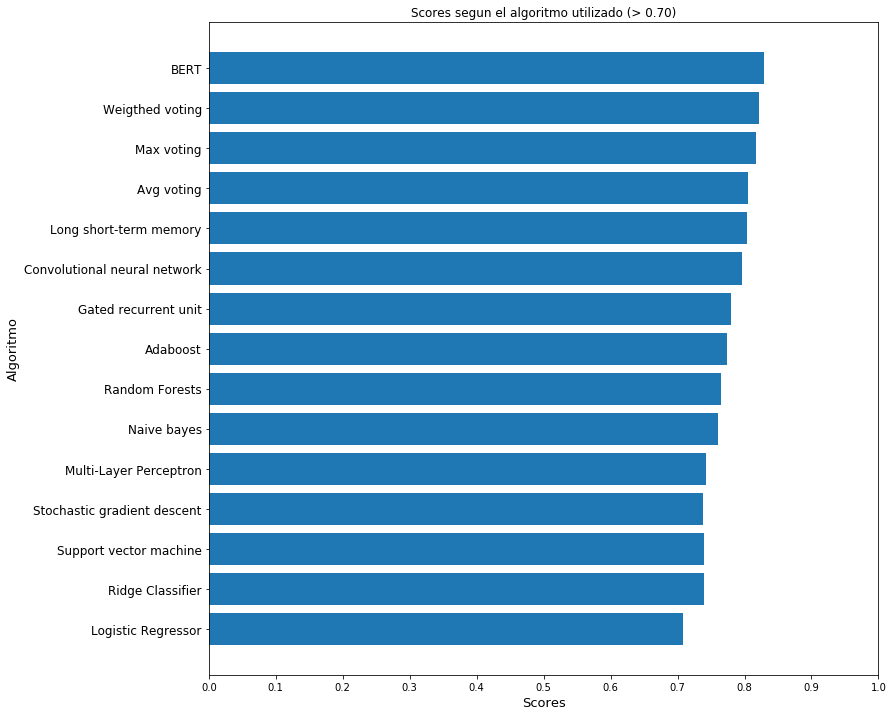

In [47]:
plt.figure(figsize=(12,12))
plt.barh(df_scores.Algoritmo, df_scores.Score, align='center')
plt.yticks(fontsize=12)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.xlabel('Scores',fontsize=13)
plt.ylabel('Algoritmo',fontsize=13)
plt.title('Scores segun el algoritmo utilizado (> 0.70)')
plt.savefig('scores_vs_algort.png', bbox_inches='tight')
plt.show()